In [ ]:
import morePVs_output as opm
import morePVs as mpv
import os
import en_utilities as um
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines



Plotting Total Building Costs
-----------------------------------


Repeating barchart plot from APSRC 2017 paper
1) for EN
2) for btm
For range of:
* PV sizes
* external tariffs and amortization periods

A) Repeat plot, replot for other parameters

B) Plot bau, en, en and pv for range of pvs for each site
   x different tariffs and terms
   x with / without parent FiT
   
   
 


In [2]:

project='EN1_value_of_pv2'
study_name='combined_value5'
base_path='C:\\Users\\z5044992\\Documents\\MainDATA\\DATA_EN_3\\studies'
op = opm.Output(base_path = base_path,
                          project = project,
                          study_name = study_name)

short_name = 'value5'

In [3]:
plot_path = os.path.join(op.plot_path,'plots_percentage_bau')
if not os.path.exists(plot_path):
    os.makedirs(plot_path)

In [4]:
self = op
df = self.data.copy()
df_in = self.study_parameters.copy()

#df=df.set_index(['scenario'])
df.head()

,scenario_label,arrangement,number_of_households,load_folder,central_battery_kWh,en_opex,en_capex_repayment,pv_capex_repayment,average_hh_bill$,average_hh_solar_bill$,...,eno_net$_mean,export_kWh_mean,import_kWh_mean,pv_ratio_mean,retailer_bill$_mean,retailer_receipt$_mean,self-consumption_mean,solar_retailer_profit_mean,total$_building_costs_mean,total_building_load_mean
scenario,,,,,,,,,,,,,,,,,,,,,
A0,siteA_value5_000,bau,208,h_all_site_A,0,0.0,0.0,0.000000,1210.652254,0,...,0.0,0.000000,1079092.178,0.000000,46188.85679,344031.9793,100.000000,0,344031.9793,1079092.178
A1,siteA_value5_001,cp_only,208,h_all_site_A,0,0.0,0.0,12277.102280,1210.652254,0,...,0.0,4.685924,1015101.292,5.935119,44630.40147,326734.0259,99.992678,0,339011.1282,1079092.178
A2,siteA_value5_002,cp_only,208,h_all_site_A,0,0.0,0.0,7050.245955,1210.652254,0,...,0.0,4.685924,1015101.292,5.935119,44630.40147,326734.0259,99.992678,0,333784.2719,1079092.178
A3,siteA_value5_003,cp_only,208,h_all_site_A,0,0.0,0.0,6842.075547,1210.652254,0,...,0.0,4.685924,1015101.292,5.935119,44630.40147,326734.0259,99.992678,0,333576.1014,1079092.178
A4,siteA_value5_004,cp_only,208,h_all_site_A,0,0.0,0.0,5808.894665,1210.652254,0,...,0.0,4.685924,1015101.292,5.935119,44630.40147,326734.0259,99.992678,0,332542.9206,1079092.178


In [5]:
df_in.head()

,pv_filename,load_folder,arrangement,pv_cap_id,cp,all_residents,parent,network_tariff,en_capex_id,a_term,a_rate,site_tag
scenario,,,,,,,,,,,,
A0,NaN,h_all_site_A,bau,NaN,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,5,0.06,a208_f12_cp34
A1,vb_pv\site_A_max.csv,h_all_site_A,cp_only,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,5,0.06,a208_f12_cp34
A2,vb_pv\site_A_max.csv,h_all_site_A,cp_only,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,10,0.06,a208_f12_cp34
A3,vb_pv\site_A_max.csv,h_all_site_A,cp_only,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,15,0.06,a208_f12_cp34
A4,vb_pv\site_A_max.csv,h_all_site_A,cp_only,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,20,0.06,a208_f12_cp34


In [6]:

df = df.merge(df_in,left_index = True, right_index=True)
for c in df.columns:
    if '_x' in c:
        nc = c[:-2]
        df.rename(columns={c:nc}, inplace=True)
df.head()

,scenario_label,arrangement,number_of_households,load_folder,central_battery_kWh,en_opex,en_capex_repayment,pv_capex_repayment,average_hh_bill$,average_hh_solar_bill$,...,arrangement_y,pv_cap_id,cp,all_residents,parent,network_tariff,en_capex_id,a_term,a_rate,site_tag
scenario,,,,,,,,,,,,,,,,,,,,,
A0,siteA_value5_000,bau,208,h_all_site_A,0,0.0,0.0,0.000000,1210.652254,0,...,bau,NaN,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,5,0.06,a208_f12_cp34
A1,siteA_value5_001,cp_only,208,h_all_site_A,0,0.0,0.0,12277.102280,1210.652254,0,...,cp_only,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,5,0.06,a208_f12_cp34
A2,siteA_value5_002,cp_only,208,h_all_site_A,0,0.0,0.0,7050.245955,1210.652254,0,...,cp_only,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,10,0.06,a208_f12_cp34
A3,siteA_value5_003,cp_only,208,h_all_site_A,0,0.0,0.0,6842.075547,1210.652254,0,...,cp_only,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,15,0.06,a208_f12_cp34
A4,siteA_value5_004,cp_only,208,h_all_site_A,0,0.0,0.0,5808.894665,1210.652254,0,...,cp_only,site_A_max,EASO_TOU_15pc_FIT8,EASO_TOU_15pc_FIT8,TIDNULL,EA310,NaN,20,0.06,a208_f12_cp34


In [7]:
df = df[df['arrangement'].isin(['bau', 'en', 'en_pv'])]

In [8]:
# Set up constants
sites = ['A','E',  'D','B', 'H', 'I', 'G', 'C',  'J', 'F' ]
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ordered_sites = dict(zip(sites,values))
tag_list = ['a208_f12_cp34',
 'a161_f7_cp38',
 'a138_f9_cp45',
 'a104_f8_cp57',
 'a52_f3_cp27',
 'a48_f4_cp09',
 'a44_f4_cp17',
 'a34_f4_cp34',
 'a26_f4_cp44',
 'a20_f5_cp37']
tag_dict=dict(zip(sites, tag_list))
tag_sorter= dict(zip(tag_list,values))


# Plotting set-up parameters
cmap = mpl.cm.tab10_r
alpha=1
sites_grouped={'all': sites,
              'group1': [s for s in sites if s in ['A','B','C','D','E']],
              'group2': [s for s in sites if s in['F', 'G','H','I','J']]}

a_terms =[a for a in [5,10,15,20,25] if a in df.a_term.tolist()]
dashList = [(2,8),(3,5),(10,0),(3,2,10,2),(5,2,20,2)] 
markers =['+','o','d','s','x']
term_dashes = dict(zip(a_terms,dashList))
term_markers = dict(zip(a_terms,markers))

# get pv sizes for maximum pv systems
maximums={}
pv_ref_file='C:\\Users\\z5044992\\Documents\\MainDATA\\DATA_EN_3\\reference\\capex_pv_lookup.csv'
pv_ref=pd.read_csv(pv_ref_file)
pv_ref = pv_ref.set_index('pv_cap_id')
for i in pv_ref.index:
    if 'max' in i and 'site' in i:
        site = um.find_between(i,'_','_')
        maximums[site] = pv_ref.loc[i,'kW']
en_capexes= [c for c in ['capex_low','capex_med','capex_high']if c in df.en_capex_id.tolist()]
#parents = [p for p in ['EA310_12c_FIT8', 'EA310_12c_FIT12', 'EA310_12c',\
#           'EA310_10c_FIT8', 'EA310_10c_FIT12', 'EA310_10c',\
#         'EA310_8c_FIT8', 'EA310_8c_FIT12','EA310_8c'] if p in df.parent.tolist()]
parents_retail = list(set([p[6:] for p in df.parent.tolist() if p != 'TIDNULL']))

In [9]:
# Organise labels (no longer used for labels- now use site_tags)
df.loc[:,'site'] = df.loc[:,'load_folder'].apply(lambda x : x[-1])
df.loc[:, 'labels'] = df.loc[:,'site']
floors = {'A':12,'E':7, 'D':9,'B':8,'H':3,'I':4,'G':4,'C':4,'J':4,'F':5}
numhouses={'A':208,'E':161, 'D':138,'B':104,'H':52,'I':48,'G':44,'C':34,'J':26,'F':20}
labels ={}
for s, f in floors.items():
    u = numhouses[s]
    labels[s] = s +'('+str(u)+'/'+str(f)+')'
print(labels)
df.loc[:, 'label'] = df.loc[:, 'site'].apply(lambda x: labels[x])




{'A': 'A(208/12)', 'E': 'E(161/7)', 'D': 'D(138/9)', 'B': 'B(104/8)', 'H': 'H(52/3)', 'I': 'I(48/4)', 'G': 'G(44/4)', 'C': 'C(34/4)', 'J': 'J(26/4)', 'F': 'F(20/5)'}


In [10]:
# get kWp / unit , total $ / unit  and % bau for each scenario
df['pv_filename'].fillna('zero',inplace=True)
for s in df.index:
    site = df.loc[s,'load_folder'][-1]
    df.loc[s,'site']=site
    if df.loc[s,'pv_filename'] == 'zero':
        df.loc[s,'kwp_unit'] =0
    elif 'max' in df.loc[s,'pv_filename']:
        df.loc[s,'kwp_unit']= maximums[site]/df.loc[s,'number_of_households']
    else:
        df.loc[s,'kwp_unit'] = float(df.loc[s,'pv_filename'][-9]) + float(df.loc[s,'pv_filename'][-7])/10
    df.loc[s,'$_unit'] = df.loc[s,'total$_building_costs_mean']/df.loc[s,'number_of_households']
    bau_scenario = df[(df['site']==site) & (df['arrangement'] == 'bau')].index
    df.loc[s,'bau'] = (df.loc[bau_scenario,'total$_building_costs_mean']).values[0]/df.loc[s,'number_of_households']
    df.loc[s,'%_bau'] = df.loc[s,'$_unit']/ df.loc[s,'bau']*100

df['parent_retail']= df['parent'].apply(lambda x: x[6:])
        

In [11]:
max_baupc = df['%_bau'].max()
min_baupc = df['%_bau'].min()
max_baupc, min_baupc

(144.48318721118764, 61.46567581677365)

In [ ]:
#LINE PLOTS
for group in ['all', 'group1','group2']:
    dfg = df.copy()[df['site'].isin(sites_grouped[group])]
    
    for parent_retail, capex in [(parent_retail, capex) for parent_retail in parents_retail for capex in en_capexes]:  
    # parent, capex = [(parent, capex) for parent in parents for capex in en_capexes][0]
        title = parent_retail + " / " + capex                        
        p_slice = dfg['parent_retail'] == parent_retail
        c_slice = dfg['en_capex_id'] == capex
        dfx=dfg.copy()[p_slice & c_slice]
        if len(dfx.index)>0:
            # Get rid of duplicates - assumed irrelevant as only variation is internal tariffs
            dfx.loc[:,'kwp_str'] = dfx.loc[:,'kwp_unit'].apply(lambda x : str(round(x,2)))
            dfx.loc[:,'aterm_str'] = dfx.loc[:,'a_term'].apply(lambda x : str(round(x,0)))
            dfx['combined'] = dfx['site']+ '_' + dfx['arrangement'] + '_'+ dfx['kwp_str']+ '_'+(dfx['aterm_str'])
            dfx['arr_pv'] = dfx['arrangement'] + '_'+ dfx['kwp_str']
            dfx = dfx.drop_duplicates('combined')
            #fx['combined'] = dfx['combined'].apply(lambda x: x[1:])
            dfx['new_label']= dfx['label']+ '_'+ dfx['aterm_str']

            # ----------------------
            # reindex and stack data
            # ----------------------
            dfx.index = [dfx.new_label,dfx.arr_pv]
            dfu = dfx['%_bau'].unstack()

            cols =dfu.columns
            cols = [c[3:] for c in cols ]
            cols = [0.0]+[float(c[3:]) for c in cols if 'pv' in c]
            dfu.columns=cols
            dfv=dfu.transpose()

            fig, ax = plt.subplots()
            for a_term in a_terms:
                a_label = '_'+str(a_term)
                for label in [c for c in dfv.columns if a_label in c]:       
                    y = dfv[label].dropna()
                    x = y.index

                    line = ax.plot(x,y,   \
                                   alpha=alpha,  c = cmap(sites.index(label[0])),\
                                   linewidth = 0.5, marker = term_markers[a_term], markersize=2 ,
                                   linestyle='--', dashes=term_dashes[a_term])

            ax.set_title(title, fontsize=16, y=1.0)
            ax.set_xlabel("PV system (kWp)", fontsize=14)
            ax.set_ylabel("Total Costs as % of BAU", fontsize=14)
            ax.grid(True)
            ax.set_ylim((min_baupc*0.9,max_baupc*1.1))

            #Legends outside box and resize chart to fit
            box = ax.get_position()
            ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

            # Create Legend for line types
            a_terms=[5,10,15,20,25]
            dashList = [(2,8),(3,5),(10,0),(3,2,10,2),(5,2,20,2)] 
            markers =['+','o','d','s','x']
            term_dashes = dict(zip(a_terms,dashList))
            term_markers = dict(zip(a_terms,markers))
            lline = {}
            for a in a_terms:
                lline[a] = mlines.Line2D([],[],color='black', marker=term_markers[a],
                                      linestyle='--', dashes=term_dashes[a],
                                         markersize=3, label=str(a) + " years" )
            handles = [lline[a] for a in a_terms]
            line_legend = ax.legend(handles = handles, loc='upper left', bbox_to_anchor=(1, 0.3),prop={'size': 9})
            # Add the legend manually to the current Axes.
            ax1 = plt.gca().add_artist(line_legend)

            # Create legend for colours
            cline = {}
            for s in sites_grouped[group]:
                cline[s] = mlines.Line2D([],[],c = cmap(sites.index(s)) , label=tag_dict[s])
            handles2 = [cline[s] for s in sites_grouped[group]]
            ax.legend(handles = handles2, loc='upper left', bbox_to_anchor=(1, 1),prop={'size': 9})


            pname = study_name +'_'+ parent_retail+'_' + capex + '.jpg'
            group_path = os.path.join(plot_path,group)
            if not os.path.exists(group_path):
                os.makedirs(group_path)          
            plotFile = os.path.join(group_path,pname)
            plt.savefig(plotFile,dpi=1000)

            plt.close()
print('*** Completed ***')


EN only:
---------
* 3 capex
* 2 parent tariffs
* 5 a_terms
* Plot cost (as proportion of BAU) vs a_term
* Colour code capex
*2 graphs for parent tariffs


In [12]:
a_terms =[a for a in [5,10,15,20,25] if a in df.a_term.tolist()]
capexes = ['capex_low','capex_med','capex_high']
dashList1 = [(3,5),(3,2,10,2),(10,0)] #(2,8),,(5,2,20,2)] 
markers1 =['+', 'o', 's'] #,'s','x']
capex_dashes = dict(zip(capexes,dashList1))
capex_markers = dict(zip(capexes,markers1))




In [13]:
parents_retail


['TOU10_FIT12',
 'TOU12',
 'TOU9_FIT12',
 'TOU12_FIT12',
 'TOU9_FIT8',
 'TOU12_FIT8',
 'TOU10_FIT8',
 'TOU9',
 'TOU10']

*** Completed ***


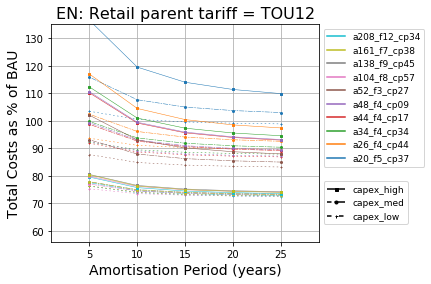

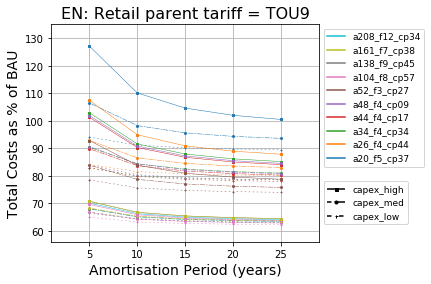

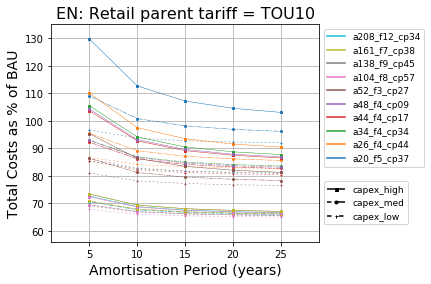

In [15]:
# PLOTTING EN ONLY FOR DIFFERENT FINANCIAL PARAMETERS
# SPECIFIC SCENARIOS
group= 'all' 
dfg = df.copy().loc[df['arrangement']=='en']
max_baupc = dfg['%_bau'].max()
min_baupc = dfg['%_bau'].min()
max_baupc, min_baupc
for parent_retail in [p for p in parents_retail if 'FIT' not in p]:
  
    title = 'EN: Retail parent tariff = ' + parent_retail                        
    p_slice = dfg['parent_retail'] == parent_retail
    dfx=dfg.copy()[p_slice]
    if len(dfx.index)>0:
        # Get rid of duplicates - assumed irrelevant as only variation is internal tariffs     
        dfx['aterm_str'] = dfx['a_term'].apply(lambda x : str(x))
        dfx['combined'] = dfx['site']+ '_' + dfx['en_capex_id'] +  '_'+(dfx['aterm_str'])

        dfx = dfx.drop_duplicates('combined')
        dfx['new_label']= dfx['site']+ '_' + dfx['en_capex_id']

        # ----------------------
        # reindex and stack data
        # ----------------------
        dfx.index = [dfx.new_label,dfx.a_term]
        dfu = dfx['%_bau'].unstack()

#         cols =dfu.columns
#         cols = [c[3:] for c in cols ]
#         cols = [0.0]+[float(c[3:]) for c in cols if 'pv' in c]
#         dfu.columns=cols
        dfv=dfu.transpose()

        fig, ax = plt.subplots()
        for capex in capexes:
            
            for label in [c for c in dfv.columns if capex in c]:       
                y = dfv[label].dropna()
                x = y.index

                line = ax.plot(x,y,   \
                               alpha=alpha,  c = cmap(sites.index(label[0])),\
                               linewidth = 0.5, marker = capex_markers[capex], markersize=2 ,
                               linestyle='--', dashes=capex_dashes[capex])

        ax.set_title(title, fontsize=16, y=1.0)
        ax.set_xlabel("Amortisation Period (years)", fontsize=14)
        ax.set_ylabel("Total Costs as % of BAU", fontsize=14)
        ax.grid(True)
        ax.set_ylim((min_baupc*0.9,135)) #max_baupc*1.1))
        ax.set_xlim(1,29)

        #Legends outside box and resize chart to fit
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

        # Create Legend for line types
        a_terms=[5,10,15,20,25]
        
        lline = {}
        for c in capexes:
            lline[c] = mlines.Line2D([],[],color='black', marker=capex_markers[c],
                                  linestyle='--', dashes=capex_dashes[c],
                                     markersize=3, label=c)
        handles = [lline[c] for c in capexes]
        line_legend = ax.legend(handles = handles[::-1], labels = capexes[::-1], loc='upper left', bbox_to_anchor=(1, 0.3),prop={'size': 9})
        


        # Add the legend manually to the current Axes.
        ax1 = plt.gca().add_artist(line_legend)

        # Create legend for colours
        cline = {}
        for s in sites_grouped[group]:
            cline[s] = mlines.Line2D([],[],c = cmap(sites.index(s)) , label=tag_dict[s])
        handles2 = [cline[s] for s in sites_grouped[group]]
        ax.legend(handles = handles2, labels = tag_list, loc='upper left', bbox_to_anchor=(1, 1),prop={'size': 9})
   

        pname = study_name +'_en_only_' + parent_retail+ '.jpg'
        group_path = os.path.join(plot_path,group)
        if not os.path.exists(group_path):
            os.makedirs(group_path)          
        plotFile = os.path.join(group_path,pname)
        plt.savefig(plotFile,dpi=1000)

        #plt.close()
print('*** Completed ***')


In [ ]:
plotFile

In [ ]:
dfx.loc[dfx['site']=='F']